## Logistic Regression

Logistic regression algorithm involves computing the probability of a record belonging to a specific class, while classifying records into a specific class with the highest probability. This algorithm assumes data points are <b>linearly seperable</b>.

The main objective of logistic regression model is to derive a model that estimates the highest probability for the target class.

Probabilities are determined by using the following sigmoid function:

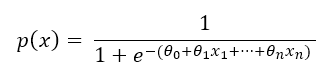

The sigmoid function can be converted into a logit function that behaves like a regular linear regression model with model coefficients, θ0 to θn:

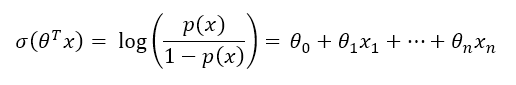

The logit function above has values range between 0 and 1, which is an easy derivative to calculate and it introduces non-linearity to model.

For binary classification, the logistic regression model performs predictions as follows:

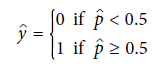

For model training, Logistic regression uses gradient descent algorithm by minimizing the following cost function with learning rate, alpha (a):

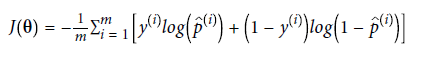

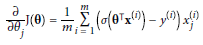

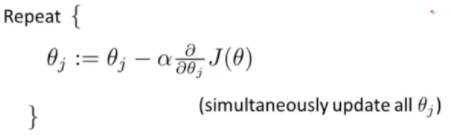

<b>Assumptions of Logistic Regression</b>:
1. Dependent variable needs to be either binary or ordinal.
2. Independent features are linearly related to log-odds
3. No strongly influential outliers
4. Observations are independent from each other.
5. Zero correlation between features (No multicollinearity) 

To support multiple classes in a classification problem, Logistic regression can be generalized without training multiple binary classifiers by using Softmax Regression instead.

<b>Requirement of feature scaling: Yes</b>

<b>Robust to outliers: No</b>

<b>Advantages of Logistic Regression:</b>
1. No assumptions about distributions of classes
2. Easily extend to multiple classes
3. Performs well for linearly separable features
4. Model coefficients can be interpreted as indicators of feature importance

<b>Disadvantages of Logistic Regression:</b>
1. Model can overfit if the number of observations is lesser than the number of features (not often)
2. Performs poorly on non linearly separable datasets
3. Difficult to observe complex relationships of the model
4. Need large dataset and also sufficient training examples for all the categories to make correct predictions.

<b>Time complexity of model training: O(np)</b>

<b>Time complexity of model prediction: O(p)</b>

<b>Space complexity of model prediction: O(p)</b>

n - Number of training samples

p - Number of features

<b>Methods to handle imbalanced dataset</b>:
1. Assign class weights to model
2. Resampling techniques (Oversampling/SMOTETomek)

## Why using Logistic Regression over Linear Regression?

While binary classification tasks can also be solved using linear regression, linear regression model has several challenges related to binary classification tasks:

1. Model very sensitive to outliers (Changes equation of best fit line), such that class predictions may change.

2. Predicted probabilities may be out of range between 0 and 1.

To resolve both challenges, sigmoid function is used as mentioned above.

<img src = "https://editor.analyticsvidhya.com/uploads/711091.png" width="500">

## Softmax Regression

Softmax regression uses the following softmax function for computing probabilities of record belonging to a given class:

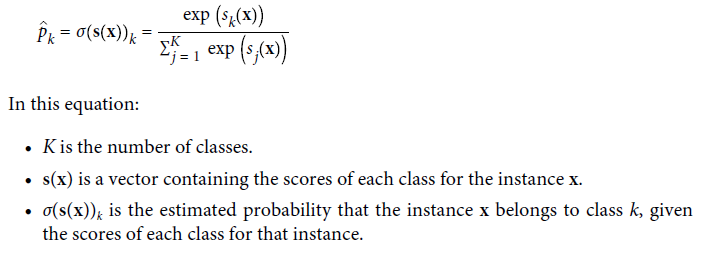

For multi-class classification, softmax regression model performs predictions as follows:

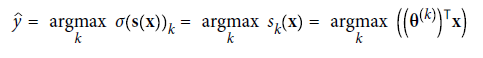

Unlike logistic regression, softmax regression predicts only one class at a time, such that <b>classes should be mutually exclusive</b>.

For model training, Softmax regression uses gradient descent algorithm by minimizing the following cost function:

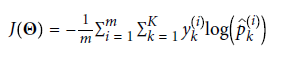

Note that the cost function above is the same as the cost function of logistic regression, when number of classes (K) equal to 2.

There are two types of strategies that can be used for multiclass classification:
1. <b>OVO (One vs One)</b> strategy: Splits a multi-class classification into one binary classification problem per class.
2. <b>OVR (One vs Rest)</b> strategy: Splits a multi-class classification into one binary classification problem per each pair of classes.

Softmax regression has the same set of assumptions as logistic regression.

## Logistic Regression Example

Refer to the following documentation for more details about the use of Logistic Regression on sklearn library:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

The following example below illustrates the process of creating a logistic regression model using sklearn library after feature engineering.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.api as sm
import feature_engine.outliers as feo
import feature_engine.wrappers as few
import feature_engine.transformation as fet
import feature_engine.selection as fes
from sklearn.datasets import fetch_kddcup99
import category_encoders as ce
import missingno
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PowerTransformer, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [2]:
dataset = fetch_kddcup99()
data = pd.concat([pd.DataFrame(dataset['data'], columns=dataset['feature_names']),
                  pd.DataFrame(dataset['target'], columns=dataset['target_names'])],axis=1)
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,b'tcp',b'http',b'SF',181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,b'normal.'
1,0,b'tcp',b'http',b'SF',239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,b'normal.'
2,0,b'tcp',b'http',b'SF',235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,b'normal.'
3,0,b'tcp',b'http',b'SF',219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,b'normal.'
4,0,b'tcp',b'http',b'SF',217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,b'normal.'


In [3]:
# Checking for duplicated rows if exist
data[data.duplicated()]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
2500,0,b'tcp',b'http',b'SF',307,60990,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'normal.'
2864,0,b'tcp',b'http',b'SF',351,11485,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,16,16,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'normal.'
2977,0,b'tcp',b'http',b'SF',506,2419,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'normal.'
3003,0,b'tcp',b'http',b'SF',319,1374,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'normal.'
3130,0,b'tcp',b'http',b'SF',234,1212,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'normal.'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493142,0,b'tcp',b'http',b'SF',303,480,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,11,11,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'normal.'
493168,0,b'tcp',b'http',b'SF',230,43464,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'normal.'
493325,0,b'tcp',b'http',b'SF',337,398,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'normal.'
493750,0,b'tcp',b'http',b'SF',206,998,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'normal.'


In [4]:
# Removing duplicated records if exist
data = data.drop_duplicates().reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145586 entries, 0 to 145585
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   duration                     145586 non-null  object
 1   protocol_type                145586 non-null  object
 2   service                      145586 non-null  object
 3   flag                         145586 non-null  object
 4   src_bytes                    145586 non-null  object
 5   dst_bytes                    145586 non-null  object
 6   land                         145586 non-null  object
 7   wrong_fragment               145586 non-null  object
 8   urgent                       145586 non-null  object
 9   hot                          145586 non-null  object
 10  num_failed_logins            145586 non-null  object
 11  logged_in                    145586 non-null  object
 12  num_compromised              145586 non-null  object
 13  root_shell    

In [5]:
data.nunique()

duration                        2495
protocol_type                      3
service                           66
flag                              11
src_bytes                       3300
dst_bytes                      10725
land                               2
wrong_fragment                     3
urgent                             4
hot                               22
num_failed_logins                  6
logged_in                          2
num_compromised                   23
root_shell                         2
su_attempted                       3
num_root                          20
num_file_creations                18
num_shells                         3
num_access_files                   7
num_outbound_cmds                  1
is_host_login                      1
is_guest_login                     2
count                            490
srv_count                        470
serror_rate                       92
srv_serror_rate                   51
rerror_rate                       77
s

Since num_outbound_cmds and is_host_login variables have only 1 unique value, both variables can be removed from the dataset.

In [6]:
data = data.drop(['num_outbound_cmds','is_host_login'],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145586 entries, 0 to 145585
Data columns (total 40 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   duration                     145586 non-null  object
 1   protocol_type                145586 non-null  object
 2   service                      145586 non-null  object
 3   flag                         145586 non-null  object
 4   src_bytes                    145586 non-null  object
 5   dst_bytes                    145586 non-null  object
 6   land                         145586 non-null  object
 7   wrong_fragment               145586 non-null  object
 8   urgent                       145586 non-null  object
 9   hot                          145586 non-null  object
 10  num_failed_logins            145586 non-null  object
 11  logged_in                    145586 non-null  object
 12  num_compromised              145586 non-null  object
 13  root_shell    

In [7]:
data[np.array(data.columns[22:29])] = data[np.array(data.columns[22:29])].astype('float')
data[np.array(data.columns[31:39])] = data[np.array(data.columns[31:39])].astype('float')
data[['protocol_type','service','flag','labels']] = data[['protocol_type','service','flag','labels']].applymap(
                                                    lambda x: x.decode('ascii'))

In [8]:
data['labels'].value_counts()/len(data['labels'])

normal.             0.603300
neptune.            0.355941
back.               0.006649
teardrop.           0.006306
satan.              0.006223
warezclient.        0.006134
ipsweep.            0.004472
smurf.              0.004403
portsweep.          0.002857
pod.                0.001415
nmap.               0.001085
guess_passwd.       0.000364
buffer_overflow.    0.000206
warezmaster.        0.000137
land.               0.000131
imap.               0.000082
rootkit.            0.000069
loadmodule.         0.000062
ftp_write.          0.000055
multihop.           0.000048
phf.                0.000027
perl.               0.000021
spy.                0.000014
Name: labels, dtype: float64

In [9]:
# Simplify example to binary classification
data = data[(data['labels'] == 'neptune.') | (data['labels'] == 'normal.')]

In [10]:
data.select_dtypes(include='object').head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_guest_login,count,srv_count,dst_host_count,dst_host_srv_count,labels
0,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,8,8,9,9,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,8,8,19,19,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,8,8,29,29,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,6,6,39,39,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,6,6,49,49,normal.


In [11]:
integer_columns = np.array(data.select_dtypes(include='object').drop(['protocol_type','service','flag','labels'],axis=1).columns)
data[integer_columns] = data[integer_columns].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139652 entries, 0 to 145585
Data columns (total 40 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     139652 non-null  int32  
 1   protocol_type                139652 non-null  object 
 2   service                      139652 non-null  object 
 3   flag                         139652 non-null  object 
 4   src_bytes                    139652 non-null  int32  
 5   dst_bytes                    139652 non-null  int32  
 6   land                         139652 non-null  int32  
 7   wrong_fragment               139652 non-null  int32  
 8   urgent                       139652 non-null  int32  
 9   hot                          139652 non-null  int32  
 10  num_failed_logins            139652 non-null  int32  
 11  logged_in                    139652 non-null  int32  
 12  num_compromised              139652 non-null  int32  
 13 

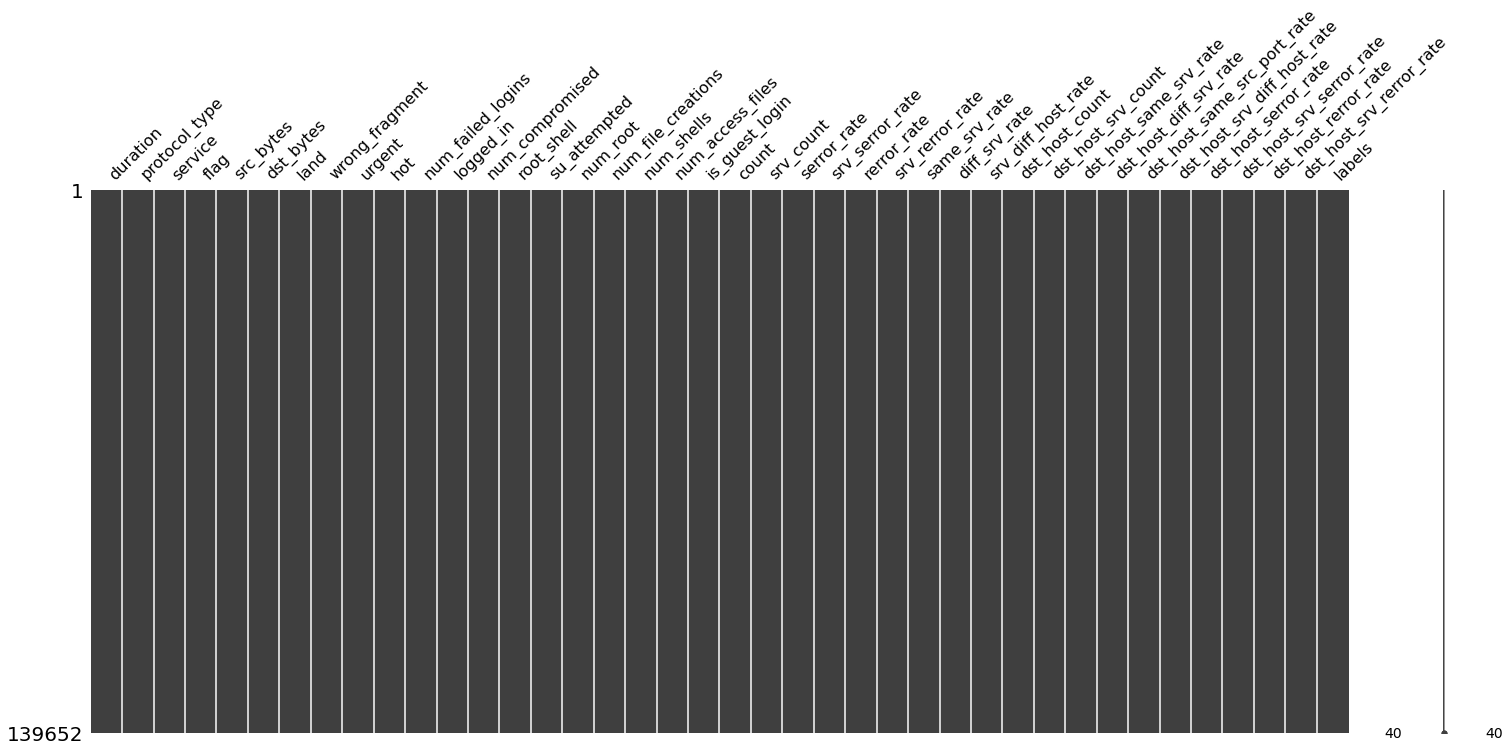

In [12]:
# Checking for missing values of features and labels if exist
missingno.matrix(data)
plt.show()

From the output above, there are no missing values found in the dataset.

In [13]:
for column in data.columns[data.nunique()<30]:
    print(data[column].value_counts()/len(data))
    print('')

tcp     0.913764
udp     0.079848
icmp    0.006387
Name: protocol_type, dtype: float64

SF      0.593976
S0      0.301292
REJ     0.100278
RSTO    0.003666
S1      0.000387
RSTR    0.000222
S2      0.000122
S3      0.000050
OTH     0.000007
Name: flag, dtype: float64

0    0.999993
1    0.000007
Name: land, dtype: float64

0    1.0
Name: wrong_fragment, dtype: float64

0    0.999993
3    0.000007
Name: urgent, dtype: float64

0     0.996119
1     0.000874
4     0.000695
6     0.000687
2     0.000294
14    0.000265
5     0.000251
30    0.000200
22    0.000200
19    0.000129
24    0.000093
18    0.000086
7     0.000029
3     0.000029
17    0.000014
12    0.000014
16    0.000007
20    0.000007
9     0.000007
Name: hot, dtype: float64

0    0.999928
1    0.000036
2    0.000021
4    0.000007
3    0.000007
Name: num_failed_logins, dtype: float64

0    0.501489
1    0.498511
Name: logged_in, dtype: float64

0      0.999513
1      0.000115
2      0.000115
3      0.000072
4      0.000064
7     

Since land and urgent variables have very high imbalanced categories, both variables are removed from the dataset.

The labels variable shows the classes are well balanced. Thus, there is no issue related to imbalanced dataset.

In [14]:
X = data.drop(['labels','wrong_fragment','land','urgent'],axis=1)
y = data['labels']

Hot, num_failed_logins, num_compromised, num_root, num_file_creations and num_access_files variables have very highly sparsed data (>99% are zeros). These variables can thus be transformed into binary variables.

In [15]:
X[['hot','num_failed_logins','num_compromised','num_root','num_file_creations','num_access_files']] = X[['hot','num_failed_logins','num_compromised','num_root','num_file_creations','num_access_files']].applymap(lambda x: 1 if x!=0 else 0)

In [16]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [17]:
# Checking number of unique categories for service variable
X_train['service'].nunique()

64

In [18]:
# Checking frequency of each category type for service variable
X_train['service'].value_counts()

http           42845
private        32969
smtp            6829
domain_u        3850
other           2866
ftp_data        2814
finger           450
ftp              337
urp_i            296
telnet           291
auth             230
ntp_u            207
eco_i            176
pop_3            140
ecr_i            124
time             105
csnet_ns          93
systat            86
iso_tsap          85
remote_job        83
echo              82
whois             82
gopher            82
shell             81
ssh               80
nntp              79
uucp_path         79
klogin            79
link              77
mtp               76
domain            76
netbios_ssn       76
discard           76
pop_2             76
ldap              75
rje               75
hostnames         73
printer           73
name              72
courier           72
vmnet             72
exec              71
bgp               71
daytime           71
netbios_ns        71
login             70
uucp              70
sql_net      

Service column has 64 unique categories with several categories having duplicated frequencies. Hashing Encoder is used instead of One Hot Encoder to reduce number of columns used for model training.

Protocol_type and flag has less than 15 unique values. One Hot Encoder can be used for encoding categories of both columns.

In [19]:
# Hash encoding on Service variable
hashencoder = ce.hashing.HashingEncoder(cols='service', n_components=8)
X_train_encoded = hashencoder.fit_transform(X_train, y_train)
X_test_encoded = hashencoder.transform(X_test, y_test)

X_train_encoded = X_train_encoded.rename(columns = {'col_0':'service_hash1','col_1':'service_hash2','col_2':'service_hash3',
                                  'col_3':'service_hash4','col_4':'service_hash5','col_5':'service_hash6',
                                  'col_6':'service_hash7','col_7':'service_hash8'})
X_test_encoded = X_test_encoded.rename(columns = {'col_0':'service_hash1','col_1':'service_hash2','col_2':'service_hash3',
                                  'col_3':'service_hash4','col_4':'service_hash5','col_5':'service_hash6',
                                  'col_6':'service_hash7','col_7':'service_hash8'})

In [20]:
# One hot encoding on protocol_type and flag variable
onehotencoder = ce.OneHotEncoder(cols=['protocol_type','flag'])
X_train_encoded = onehotencoder.fit_transform(X_train_encoded)
X_test_encoded = onehotencoder.transform(X_test_encoded)

In [21]:
numerical_columns = []
categorical_columns = []
for column in X_train_encoded.columns:
    if X_train_encoded[column].dtype == object or X_train_encoded[column].nunique()<3:
        categorical_columns.append(column)
    else:
        numerical_columns.append(column)

In [22]:
continuous_columns = []
for column in numerical_columns:
     if X_train_encoded[column].dtype == float or (X_train_encoded[column].nunique()>100):
            continuous_columns.append(column)

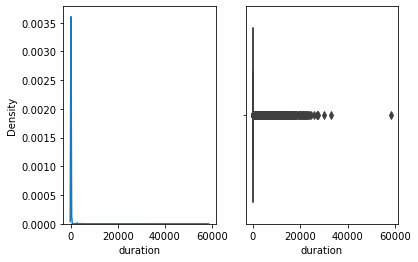

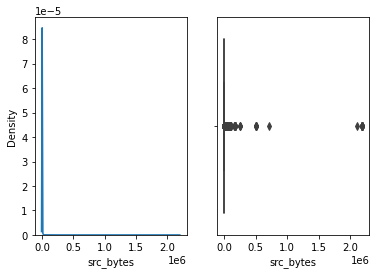

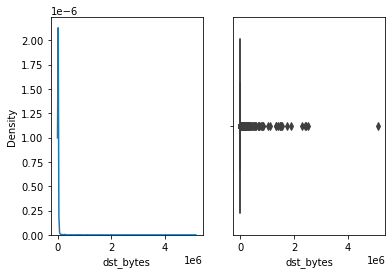

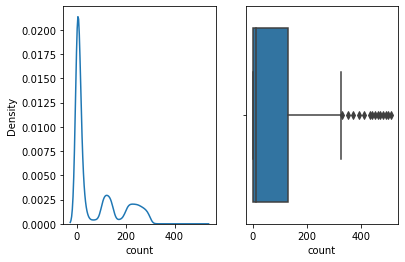

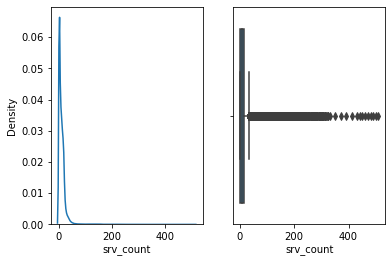

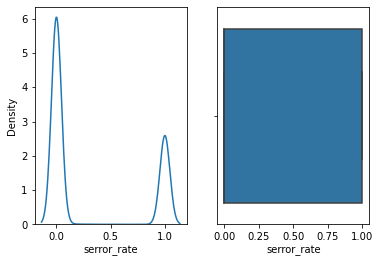

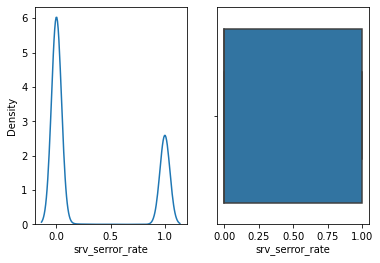

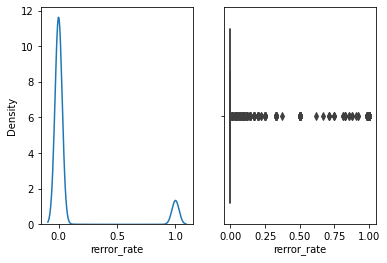

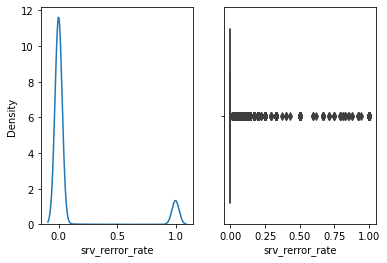

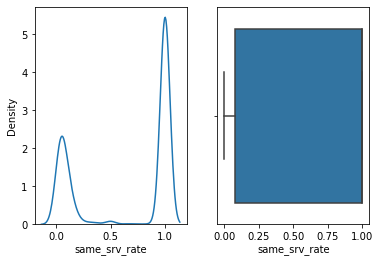

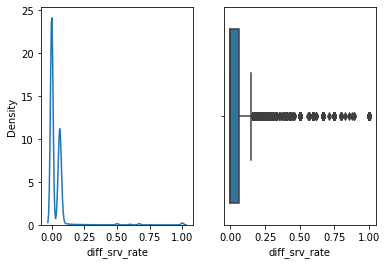

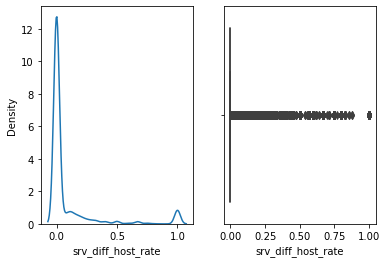

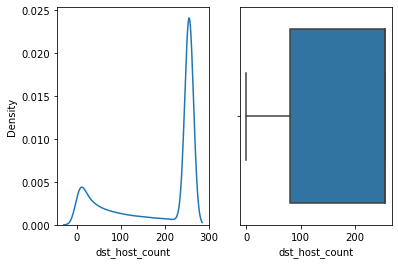

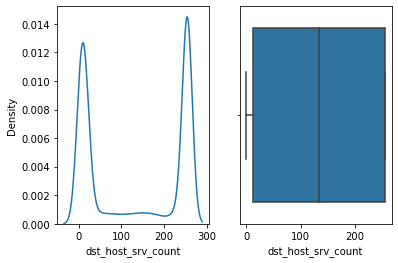

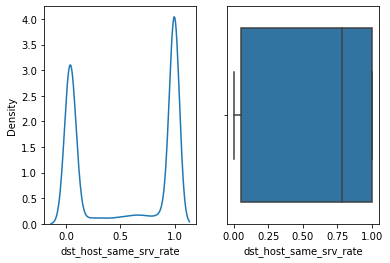

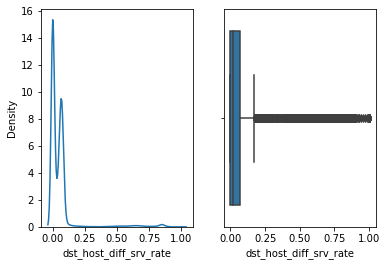

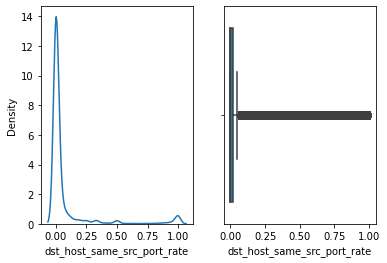

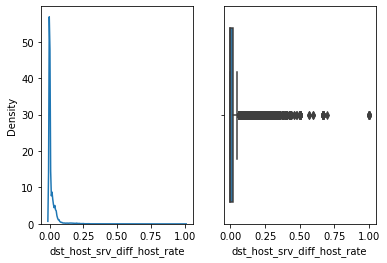

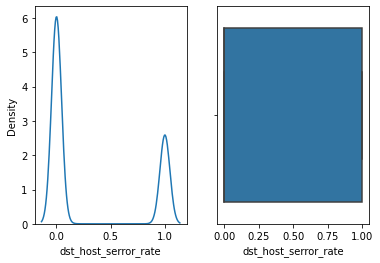

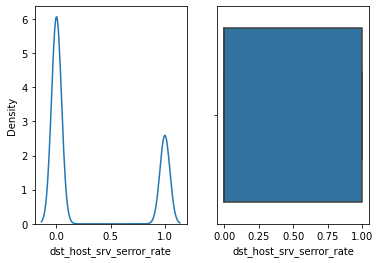

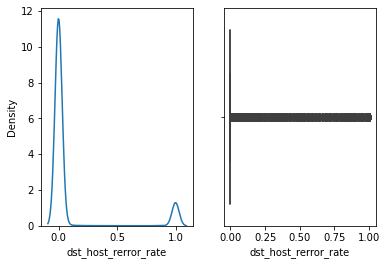

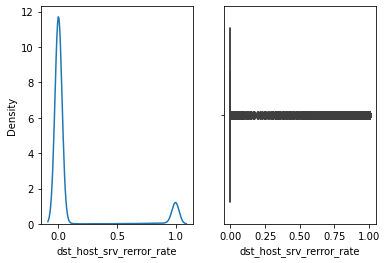

In [23]:
for column in continuous_columns:
    fig, ax = plt.subplots(1,2)
    sns.kdeplot(data=X_train_encoded, x=column, ax=ax[0])
    sns.boxplot(data=X_train_encoded, x=column, ax=ax[1])
    plt.show()

Most variables have very highly right skewed data (zero-inflated). Therefore, relying on IQR statistics to identify outliers may not be suitable in this case, as removing outliers using IQR method may result in variables having zero variance. Instead, percentile method is used to remove outliers beyond certain percentile threshold.

In [24]:
# Removing extreme outliers beyond 95th percentile
X_train_trim_outliers = X_train_encoded.copy()
X_test_trim_outliers = X_test_encoded.copy()
trimmer = feo.Winsorizer(capping_method='quantiles', tail='right', fold=0.05, variables = continuous_columns)
X_train_trim_outliers = trimmer.fit_transform(X_train_encoded)
X_test_trim_outliers = trimmer.transform(X_test_encoded)

In [25]:
no_outlier_index = X_train_trim_outliers.dropna().index
X_train_trim_outliers = X_train_trim_outliers.dropna()
y_train_trim_outliers = y_train[no_outlier_index]
no_outlier_index = X_test_trim_outliers.dropna().index
X_test_trim_outliers = X_test_trim_outliers.dropna()
y_test_trim_outliers = y_test[no_outlier_index]

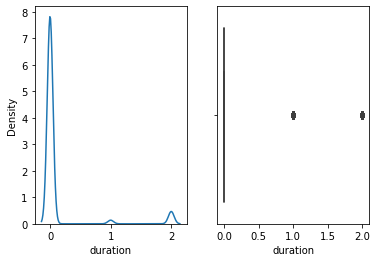

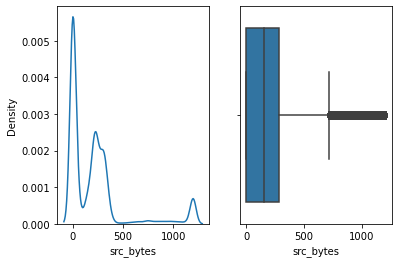

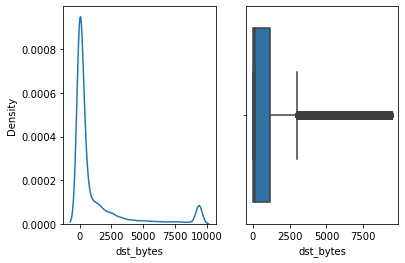

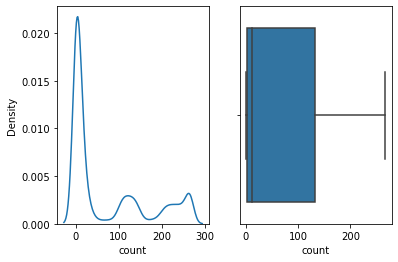

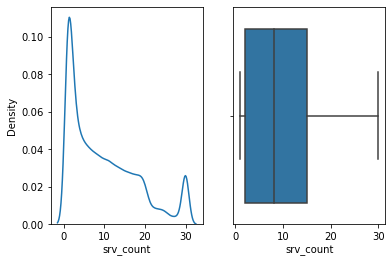

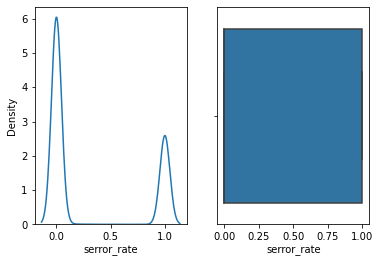

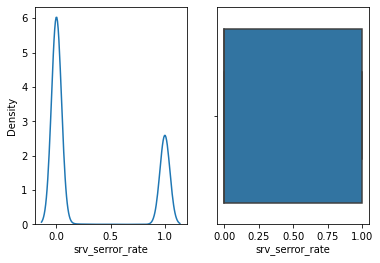

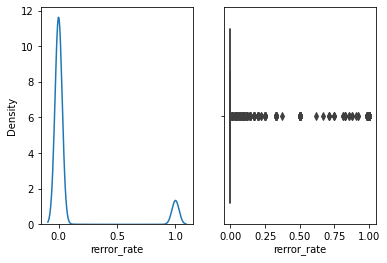

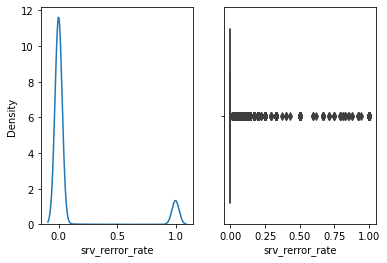

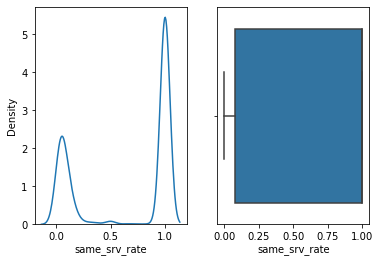

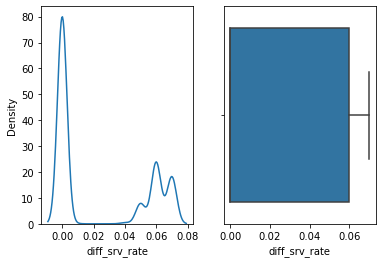

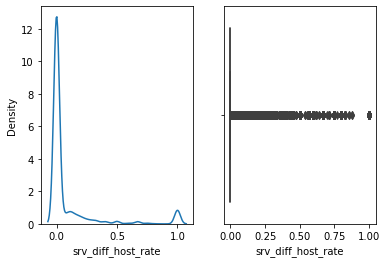

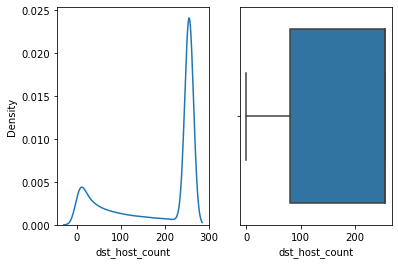

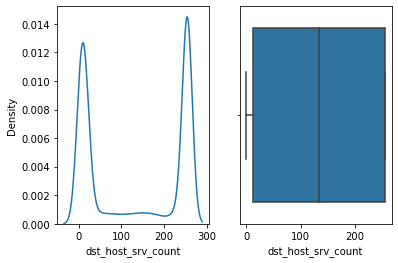

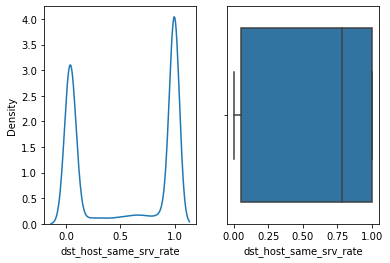

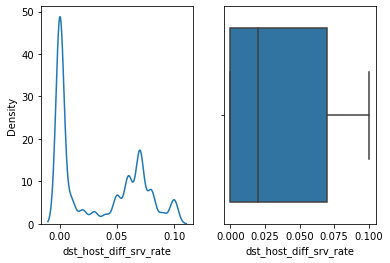

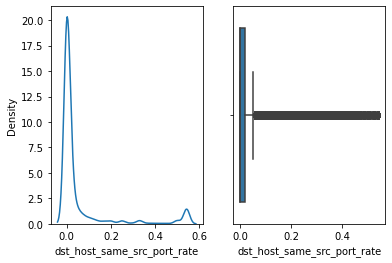

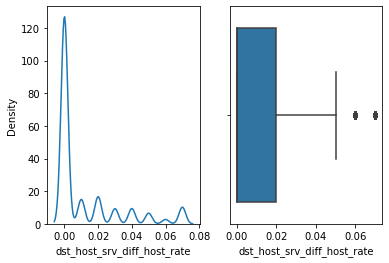

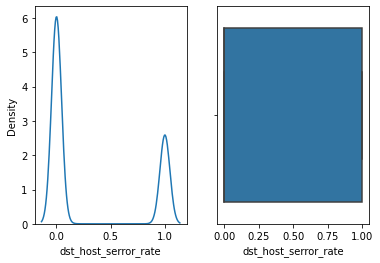

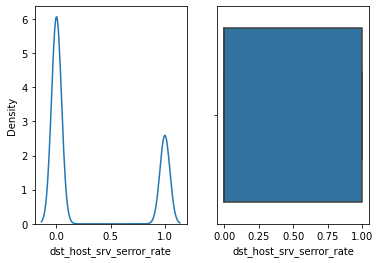

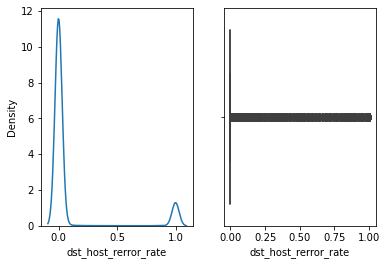

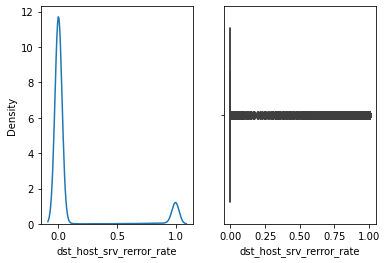

In [26]:
for column in continuous_columns:
    fig, ax = plt.subplots(1,2)
    sns.kdeplot(data=X_train_trim_outliers, x=column, ax=ax[0])
    sns.boxplot(data=X_train_trim_outliers, x=column, ax=ax[1])
    plt.show()

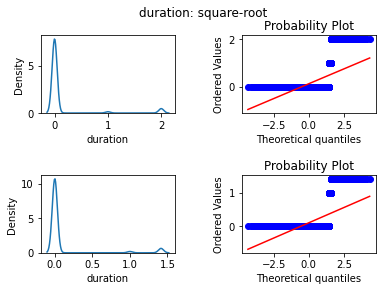

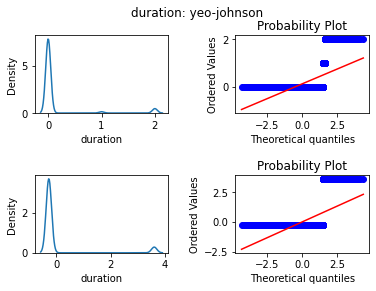

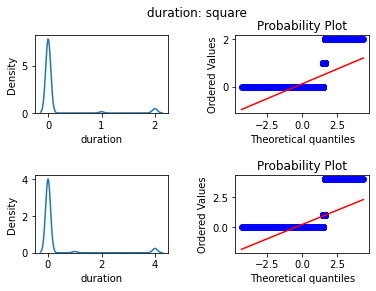

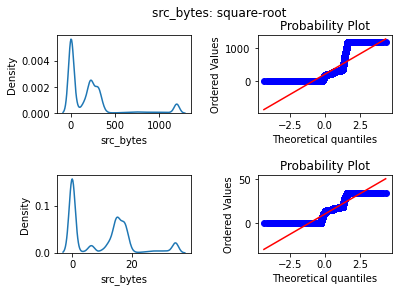

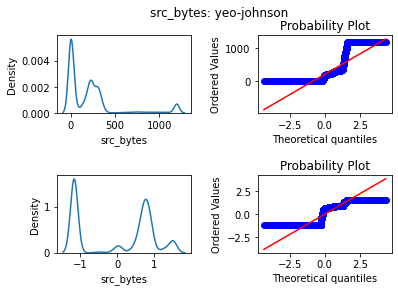

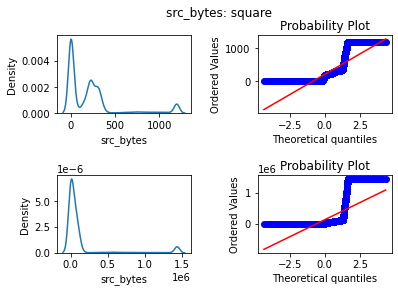

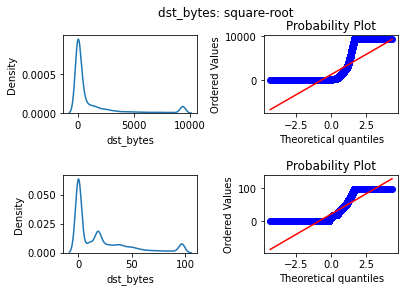

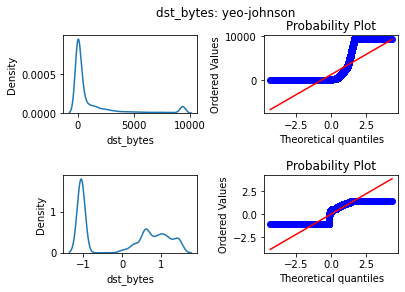

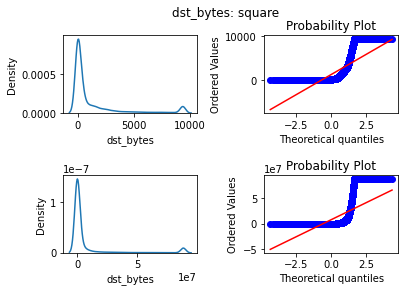

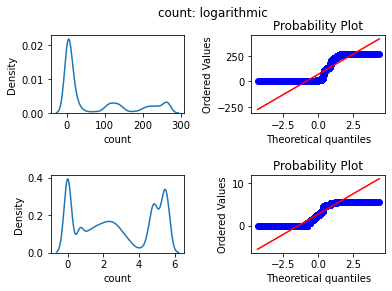

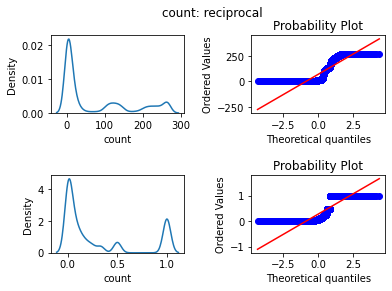

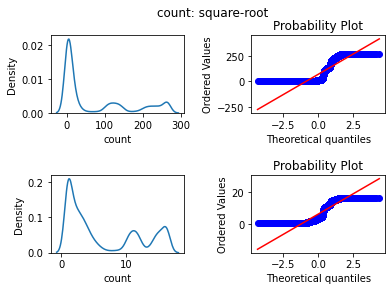

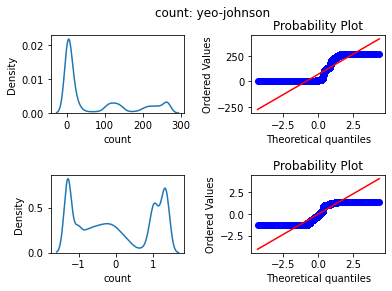

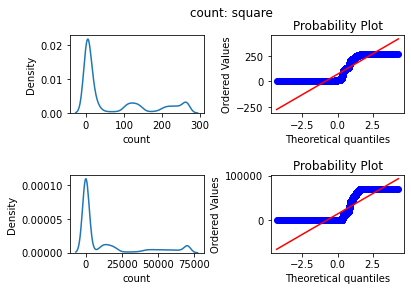

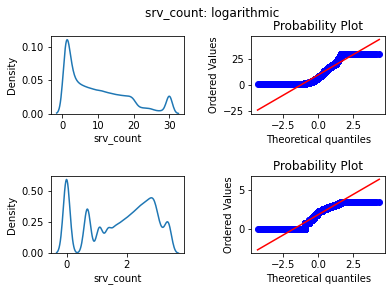

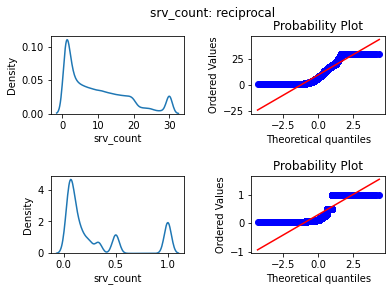

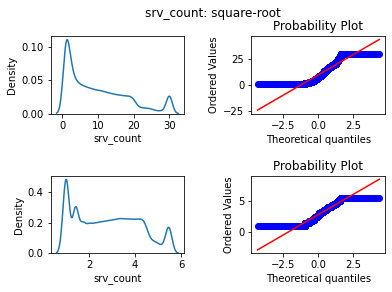

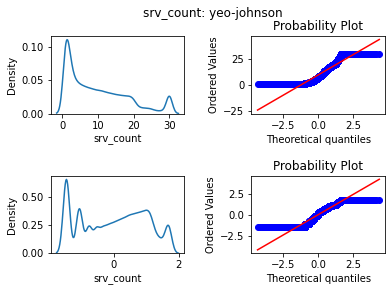

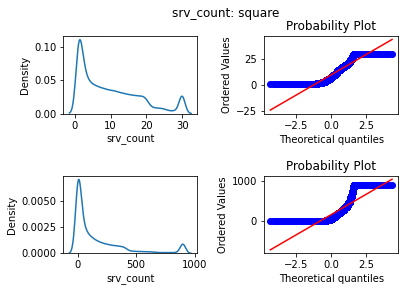

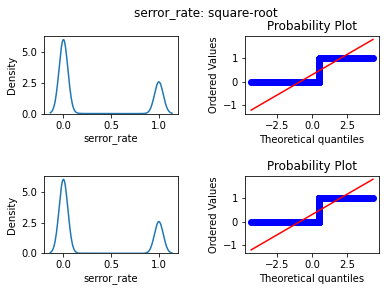

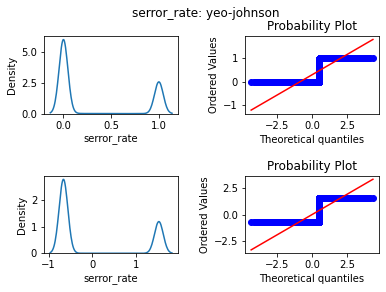

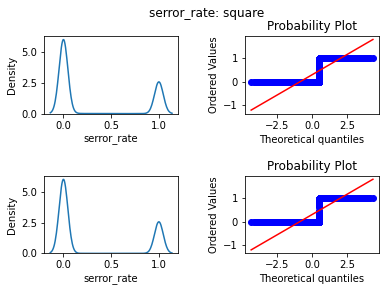

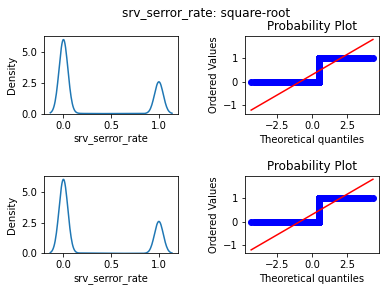

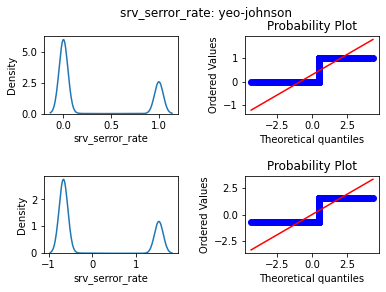

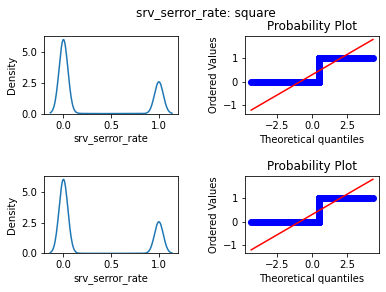

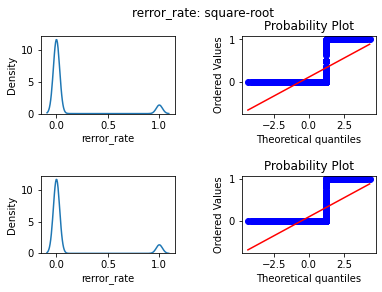

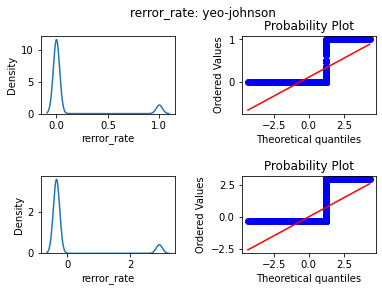

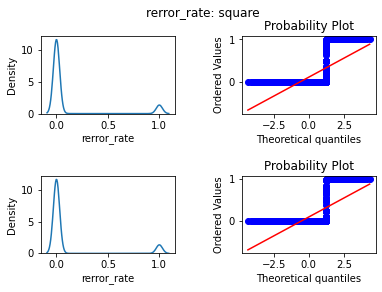

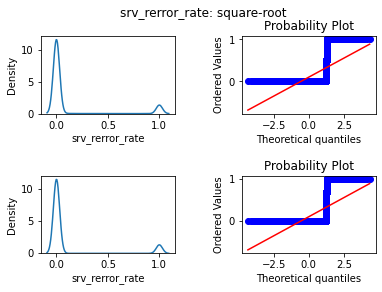

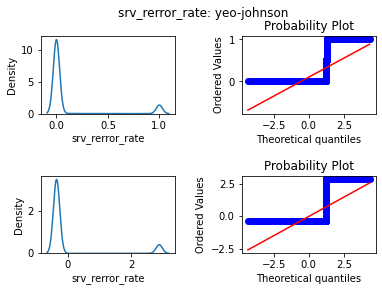

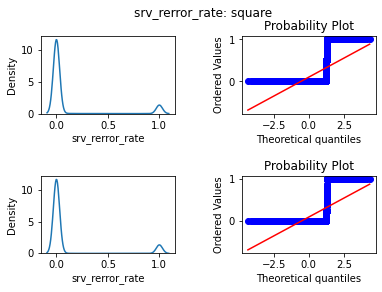

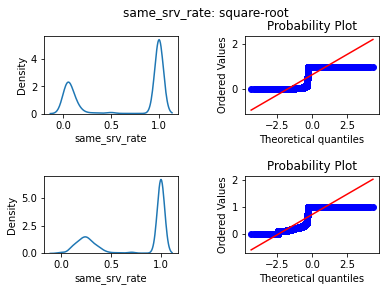

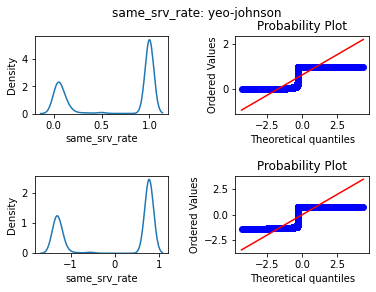

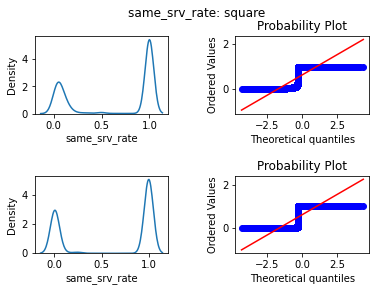

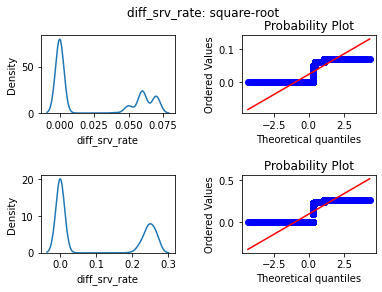

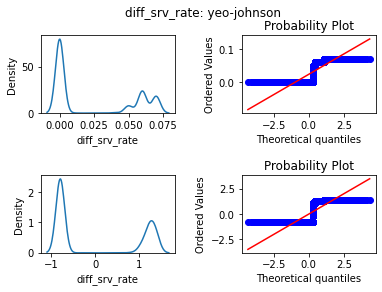

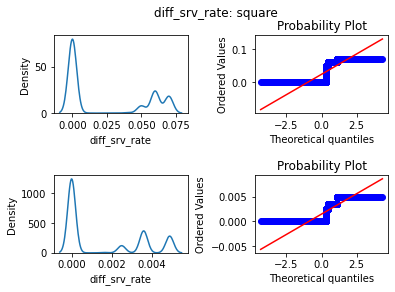

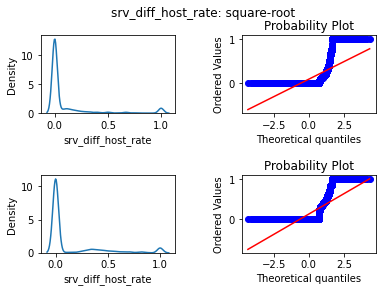

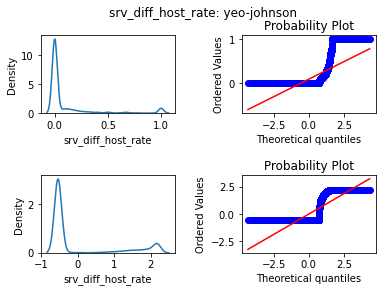

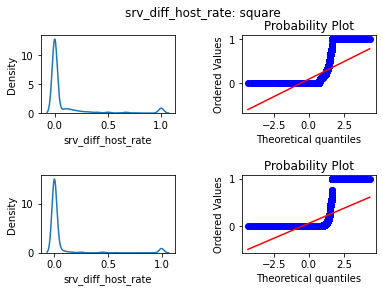

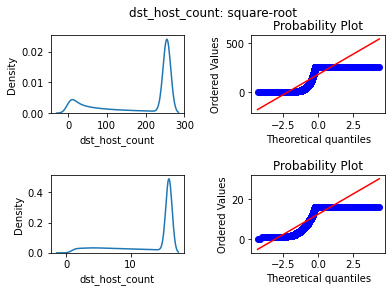

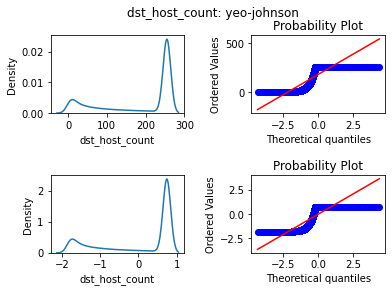

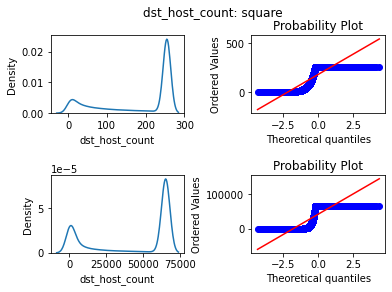

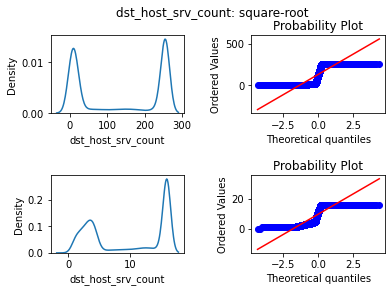

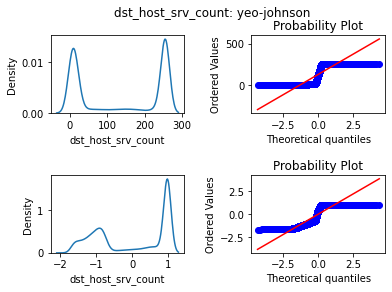

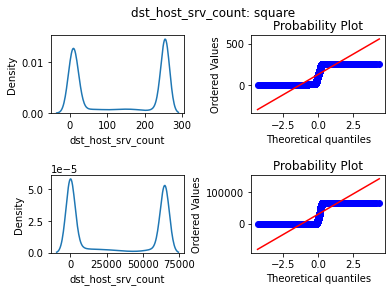

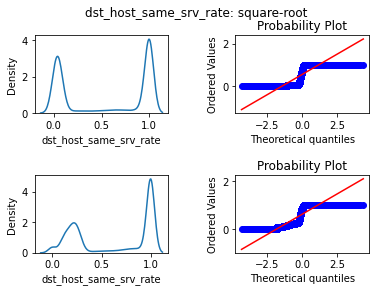

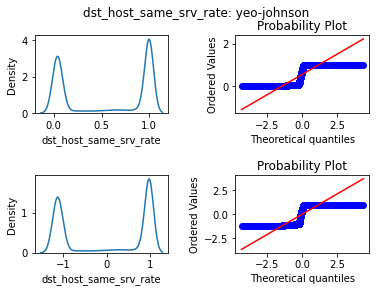

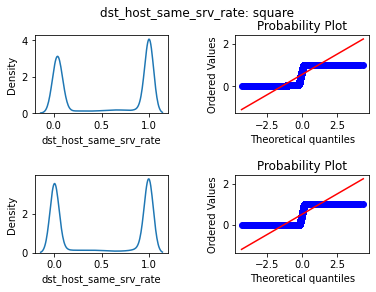

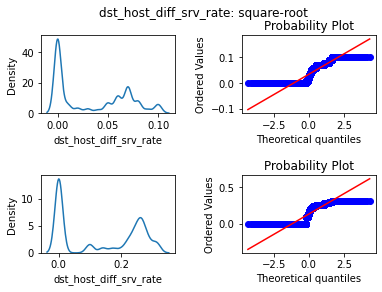

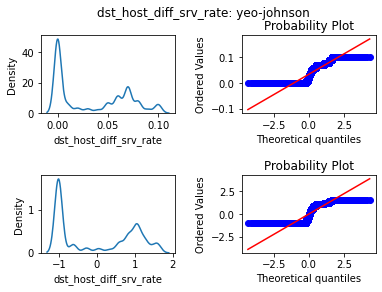

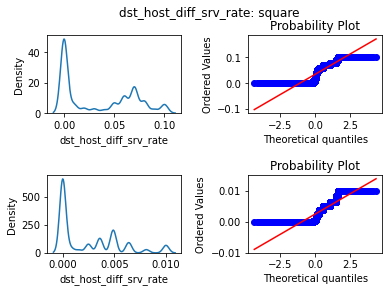

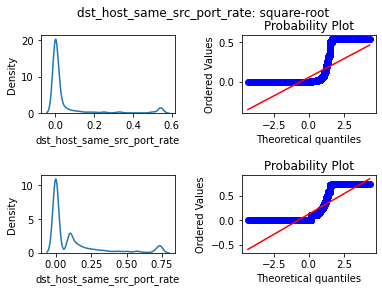

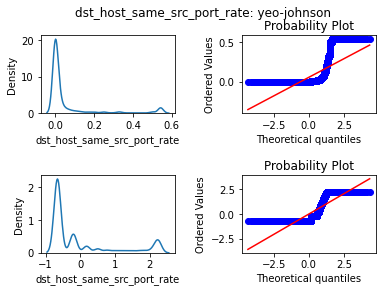

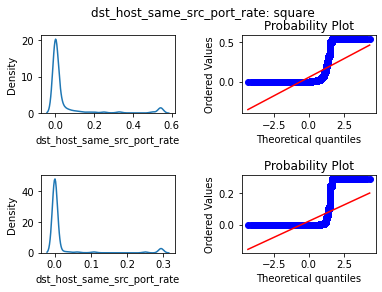

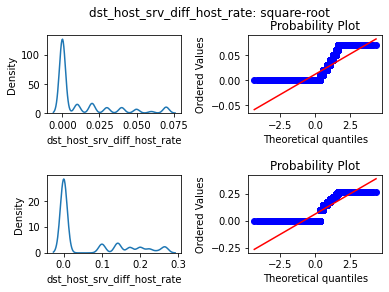

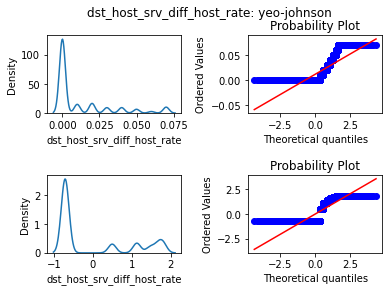

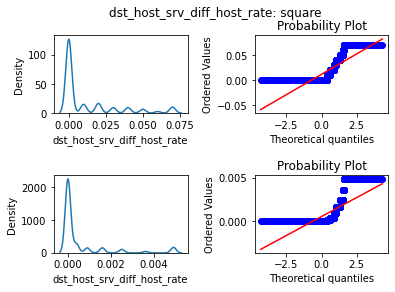

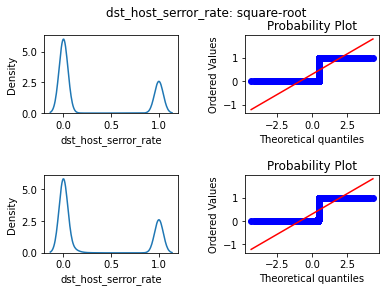

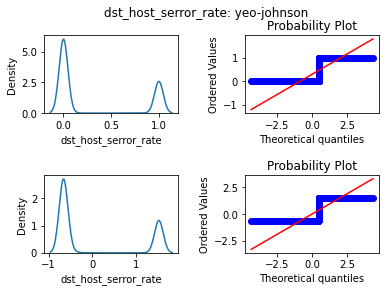

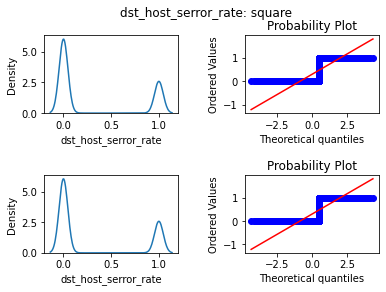

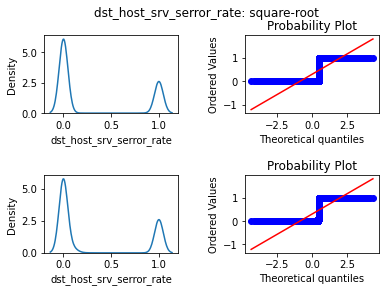

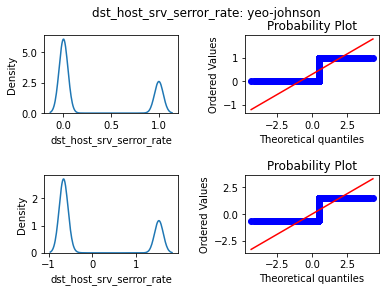

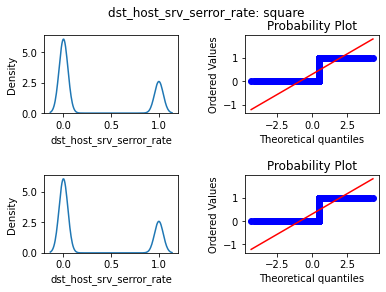

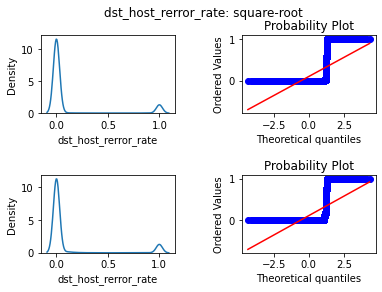

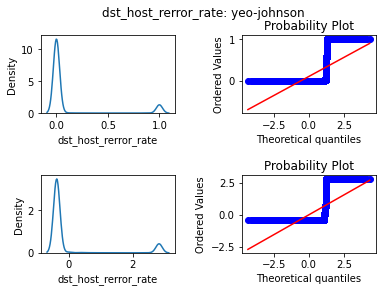

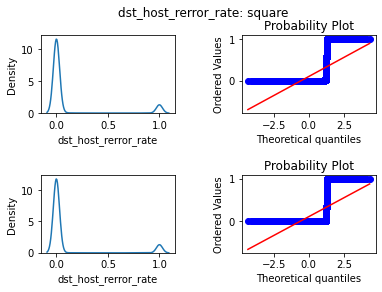

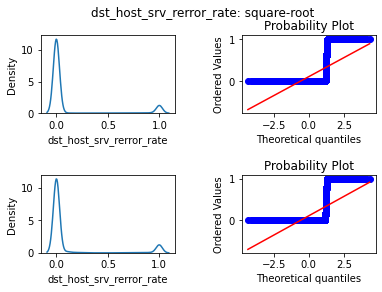

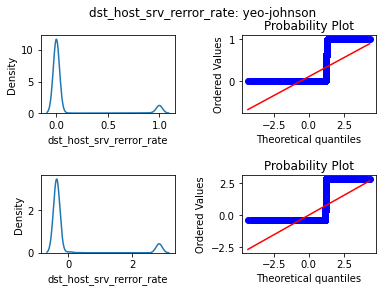

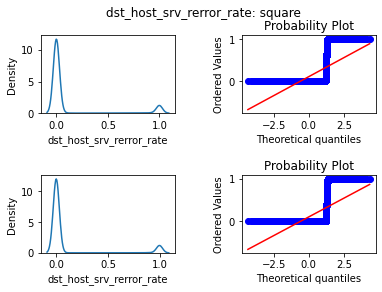

In [27]:
transformer_list = [fet.LogTransformer(), fet.ReciprocalTransformer(), fet.PowerTransformer(exp=0.5),
                   few.SklearnTransformerWrapper(PowerTransformer(method='yeo-johnson')), fet.PowerTransformer(exp=2)]
transformer_names = ['logarithmic','reciprocal','square-root','yeo-johnson','square']

result_names = []
result_test_stats = []
result_skewness = []
result_kurtosis = []
result_columns = []
result_critical_value=[]

for column in continuous_columns:
    for transformer, name in zip(transformer_list, transformer_names):
        try:
            X_transformed = transformer.fit_transform(X_train_trim_outliers[[column]])
            f, ax = plt.subplots(2,2)
            sns.kdeplot(data = X_train_trim_outliers, x=column,ax=ax[0][0])
            st.probplot(X_train_trim_outliers[column], plot=ax[0][1])
            sns.kdeplot(data=X_transformed, x=column,ax=ax[1][0])
            st.probplot(X_transformed[column], plot=ax[1][1])
            plt.subplots_adjust(wspace=0.5, hspace=0.8)
            plt.suptitle(f"{column}: {name}")
            plt.show()
            result_columns.append(column)
            result_names.append(name)
            result_test_stats.append(st.anderson(X_transformed[column])[0])
            result_critical_value.append(st.anderson(X_transformed[column])[1][2])
            result_skewness.append(np.round(X_transformed[column].skew(),6))
            result_kurtosis.append(np.round(X_transformed[column].kurt(),6))
        except:
            continue

In [28]:
results = pd.DataFrame([pd.Series(result_columns), pd.Series(result_names),pd.Series(result_test_stats),
                        pd.Series(result_critical_value),pd.Series(result_skewness),pd.Series(result_kurtosis)]).T
results.columns = ['Variable','Transformation_Type', 'Test-stats','Critical value','Skewness','Kurtosis']
results.sort_values(['Variable','Test-stats'])

,Variable,Transformation_Type,Test-stats,Critical value,Skewness,Kurtosis
9,count,logarithmic,3655.258233,0.787,0.033901,-1.499605
12,count,yeo-johnson,4072.988753,0.787,0.074278,-1.543211
11,count,square-root,7214.779422,0.787,0.637098,-1.236067
10,count,reciprocal,12823.431359,0.787,1.130366,-0.433549
13,count,square,15258.764197,0.787,1.505227,0.759843
36,diff_srv_rate,square,14149.131645,0.787,0.687227,-1.290637
34,diff_srv_rate,square-root,17083.084546,0.787,0.485702,-1.740527
35,diff_srv_rate,yeo-johnson,17276.421927,0.787,0.482918,-1.748186
6,dst_bytes,square-root,8065.004146,0.787,1.379609,0.952188
7,dst_bytes,yeo-johnson,9055.697159,0.787,0.035044,-1.739357


From the results above, none of the test statistics are less than critical value after performing various feature transformation techniques. Therefore, none of the continuous variables are gaussian distributed after feature transformation.

In [29]:
# Perform feature scaling using Robust Scaler, since only extreme outliers are removed from the dataset
scaler = RobustScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_trim_outliers), columns = X_train_trim_outliers.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_trim_outliers), columns = X_test_trim_outliers.columns)

In [30]:
# Removing resampled features with constant variance
selector = fes.DropConstantFeatures()
X_train_scaled = selector.fit_transform(X_train_scaled)
X_test_scaled = selector.transform(X_test_scaled)

In [31]:
# Checking for multicollinearity if exist
vif = [variance_inflation_factor(X_train_scaled.values, i) for i in range(X_train_scaled.shape[1])]
vif_results = pd.DataFrame({'vif': vif}, index=X_train_scaled.columns)
vif_results.sort_values(by='vif',ascending=False)

C:\Users\yixia\anaconda3\envs\Data_Science\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,vif
flag_9,inf
flag_8,4.503600e+15
flag_7,2.251800e+15
flag_4,9.007199e+14
flag_2,6.433714e+14
flag_6,5.004000e+14
flag_3,1.876500e+14
protocol_type_3,1.580210e+14
flag_5,1.217189e+14
flag_1,6.982325e+13


In [32]:
X_train_scaled_sub = X_train_scaled.copy()
vif = [variance_inflation_factor(X_train_scaled_sub.values, i) for i in range(X_train_scaled_sub.shape[1])]
vif_results = pd.DataFrame({'vif': vif}, index=X_train_scaled_sub.columns)
column_remove = []

# Removing variable with highest variance inflation factor on every iteration until all variables have VIF value less than 5
while vif_results.sort_values(by='vif',ascending=False).iloc[0].values[0] > 5:
    column = vif_results.sort_values(by='vif',ascending=False).iloc[0].name
    X_train_scaled_sub = X_train_scaled_sub.drop(column,axis=1)
    column_remove.append(column)
    
    vif = [variance_inflation_factor(X_train_scaled_sub.values, i) for i in range(X_train_scaled_sub.shape[1])]
    vif_results = pd.DataFrame({'vif': vif}, index=X_train_scaled_sub.columns)

C:\Users\yixia\anaconda3\envs\Data_Science\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [33]:
vif = [variance_inflation_factor(X_train_scaled_sub.values, i) for i in range(X_train_scaled_sub.shape[1])]
vif_results = pd.DataFrame({'vif': vif}, index=X_train_scaled_sub.columns)
vif_results.sort_values(by='vif',ascending=False)

,vif
is_guest_login,3.982489
dst_host_diff_srv_rate,3.858329
count,3.535197
hot,3.496259
protocol_type_2,3.363382
service_hash1,3.336029
service_hash2,2.353414
dst_host_srv_diff_host_rate,2.264041
dst_host_same_src_port_rate,2.073309
duration,1.949700


In [34]:
no_duplicated_index = X_train_scaled_sub.drop_duplicates().index
y_train_trim_outliers_sub = y_train_trim_outliers.reset_index(drop=True)[no_duplicated_index]
X_train_scaled_sub = X_train_scaled_sub.drop_duplicates()

In [35]:
class LogisticRegressionWithThreshold(LogisticRegression):
    def predict(self, X, threshold=None):
        """
            Predicts class label for binary classification based on threshold if specified.
        """
        if threshold == None: # If no threshold passed in, simply call the base class predict, effectively threshold=0.5
            return LogisticRegression.predict(self, X)
        else:
            y_scores = LogisticRegression.predict_proba(self, X)[:, 1]
            y_pred_with_threshold = (y_scores >= threshold).astype(int)

            return y_pred_with_threshold
    
    def threshold_from_optimal_tpr_minus_fpr(self, X, y):
        """
            Determine optimal threshold from ROC curve for binary classification based on maximum difference 
            between true positive rate and false positive rate.
        """
        y_scores = LogisticRegression.predict_proba(self, X)[:, 1]
        fpr, tpr, thresholds = roc_curve(y, y_scores,pos_label='normal.') 

        optimal_idx = np.argmax(tpr - fpr)

        return thresholds[optimal_idx], tpr[optimal_idx] - fpr[optimal_idx]

In [36]:
def binary_cf_matrix_plot(cf_matrix, label=[0,1]):
    """
        Plots a confusion matrix for binary classification problem using heatmaps.
    """
    group_names = ['True Negative','False Positive','False Negative','True Positive']
    group_counts = [f"{value}" for value in cf_matrix.flatten()]
    group_percentages = [f"{value:.2f}%" for value in cf_matrix.flatten()/np.sum(cf_matrix)*100]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot=labels, fmt='', xticklabels=label,yticklabels=label)
    plt.xlabel('Predicted labels')
    plt.ylabel('Actual labels')
    plt.show()

### Original Model Performance

In [37]:
classifier = LogisticRegression(max_iter=10000)
classifier.fit(X_train_encoded, y_train)
y_pred = classifier.predict(X_test_encoded)
y_pred_proba = classifier.predict_proba(X_test_encoded)[:, 1]
print(classification_report(y_pred, y_test,digits=6))
print('Default threshold: 0.5')

              precision    recall  f1-score   support

    neptune.   0.999746  0.999873  0.999809     15734
     normal.   0.999924  0.999847  0.999885     26162

    accuracy                       0.999857     41896
   macro avg   0.999835  0.999860  0.999847     41896
weighted avg   0.999857  0.999857  0.999857     41896

Default threshold: 0.5


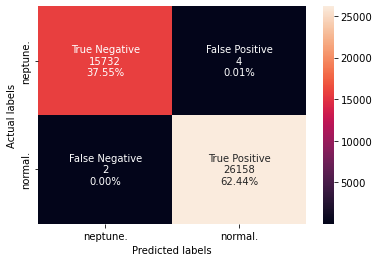

In [38]:
# Confusion matrix
cf_matrix = confusion_matrix(y_test,y_pred)
binary_cf_matrix_plot(cf_matrix,['neptune.','normal.'])

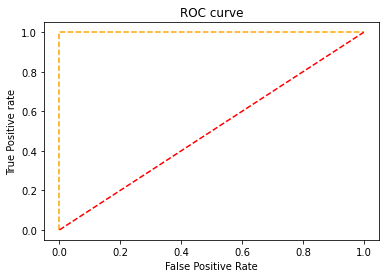

AUC Score: 0.9999999635616107


In [39]:
# plotting ROC curve
fpr, tpr, thresh = roc_curve(y_test, y_pred_proba,pos_label='normal.')
plt.plot(fpr, tpr, linestyle='--',color='orange')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.title('ROC curve')
plt.show()
print(f"AUC Score: {roc_auc_score(y_test, y_pred_proba)}")

In [40]:
# Fitting logistic regression model with optimal threshold
lrt = LogisticRegressionWithThreshold(max_iter=10000)
lrt.fit(X_train_encoded, y_train)
threshold, optimal_tpr_minus_fpr = lrt.threshold_from_optimal_tpr_minus_fpr(X_train_encoded, y_train)
y_pred = lrt.predict(X_test_encoded, threshold)
y_pred = np.where(y_pred==0,'neptune.','normal.')
print(classification_report(y_pred, y_test,digits=6))
print(f'Optimal threshold: {threshold}')

              precision    recall  f1-score   support

    neptune.   0.999809  0.999809  0.999809     15736
     normal.   0.999885  0.999885  0.999885     26160

    accuracy                       0.999857     41896
   macro avg   0.999847  0.999847  0.999847     41896
weighted avg   0.999857  0.999857  0.999857     41896

Optimal threshold: 0.5570189668139678


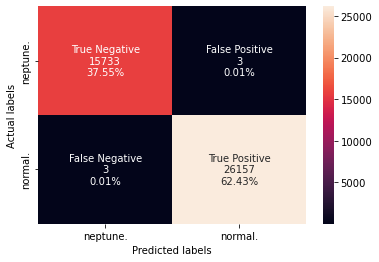

In [41]:
# Confusion matrix with optimal threshold
cf_matrix = confusion_matrix(y_test,y_pred)
binary_cf_matrix_plot(cf_matrix,['neptune.','normal.'])

### Model Performance (Removing extreme outliers)

In [42]:
classifier = LogisticRegression(max_iter=10000)
classifier.fit(X_train_trim_outliers, y_train_trim_outliers)
y_pred = classifier.predict(X_test_trim_outliers)
y_pred_proba = classifier.predict_proba(X_test_trim_outliers)[:, 1]
print(classification_report(y_pred, y_test_trim_outliers,digits=6))
print('Default threshold: 0.5')

              precision    recall  f1-score   support

    neptune.   0.999809  0.999873  0.999841     15735
     normal.   0.999924  0.999885  0.999904     26161

    accuracy                       0.999881     41896
   macro avg   0.999866  0.999879  0.999873     41896
weighted avg   0.999881  0.999881  0.999881     41896

Default threshold: 0.5


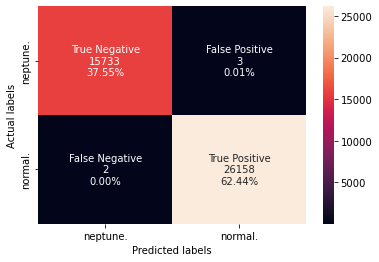

In [43]:
# Confusion matrix
cf_matrix = confusion_matrix(y_test_trim_outliers,y_pred)
binary_cf_matrix_plot(cf_matrix,['neptune.','normal.'])

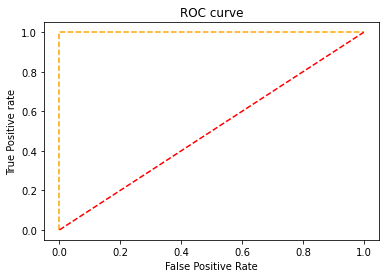

AUC Score: 0.9999999635616107


In [44]:
# plotting ROC curve
fpr, tpr, thresh = roc_curve(y_test_trim_outliers, y_pred_proba,pos_label='normal.')
plt.plot(fpr, tpr, linestyle='--',color='orange')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.title('ROC curve')
plt.show()
print(f"AUC Score: {roc_auc_score(y_test_trim_outliers, y_pred_proba)}")

In [45]:
# Fitting logistic regression model with optimal threshold
lrt = LogisticRegressionWithThreshold(max_iter=10000)
lrt.fit(X_train_trim_outliers, y_train_trim_outliers)
threshold, optimal_tpr_minus_fpr = lrt.threshold_from_optimal_tpr_minus_fpr(X_train_trim_outliers, y_train_trim_outliers)
y_pred = lrt.predict(X_test_trim_outliers, threshold)
y_pred = np.where(y_pred==0,'neptune.','normal.')
print(classification_report(y_pred, y_test_trim_outliers,digits=6))
print(f'Optimal threshold: {threshold}')

              precision    recall  f1-score   support

    neptune.   0.999809  0.999809  0.999809     15736
     normal.   0.999885  0.999885  0.999885     26160

    accuracy                       0.999857     41896
   macro avg   0.999847  0.999847  0.999847     41896
weighted avg   0.999857  0.999857  0.999857     41896

Optimal threshold: 0.5512887535798151


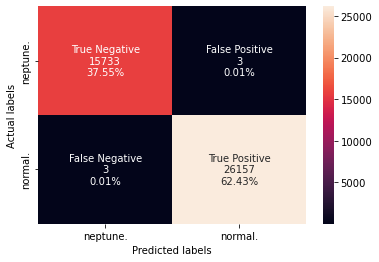

In [46]:
# Confusion matrix
cf_matrix = confusion_matrix(y_test_trim_outliers,y_pred)
binary_cf_matrix_plot(cf_matrix,['neptune.','normal.'])

### Model Performance (Removing outliers and feature scaling)

In [47]:
classifier = LogisticRegression(max_iter=10000)
classifier.fit(X_train_scaled, y_train_trim_outliers)
y_pred = classifier.predict(X_test_scaled)
y_pred_proba = classifier.predict_proba(X_test_scaled)[:, 1]
print(classification_report(y_pred, y_test_trim_outliers,digits=6))
print('Default threshold: 0.5')

              precision    recall  f1-score   support

    neptune.   0.999809  0.999809  0.999809     15736
     normal.   0.999885  0.999885  0.999885     26160

    accuracy                       0.999857     41896
   macro avg   0.999847  0.999847  0.999847     41896
weighted avg   0.999857  0.999857  0.999857     41896

Default threshold: 0.5


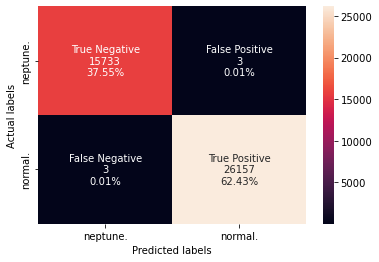

In [48]:
# Confusion matrix
cf_matrix = confusion_matrix(y_test_trim_outliers,y_pred)
binary_cf_matrix_plot(cf_matrix,['neptune.','normal.'])

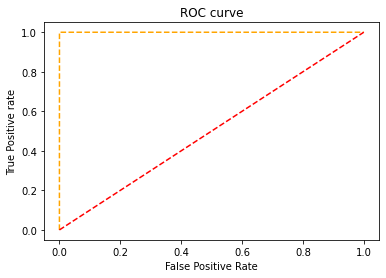

AUC Score: 0.9999999538447066


In [49]:
# plotting ROC curve  
fpr, tpr, thresh = roc_curve(y_test_trim_outliers, y_pred_proba,pos_label='normal.')
plt.plot(fpr, tpr, linestyle='--',color='orange')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.title('ROC curve')
plt.show()
print(f"AUC Score: {roc_auc_score(y_test_trim_outliers, y_pred_proba)}")

In [50]:
# Fitting logistic regression model with optimal threshold
lrt = LogisticRegressionWithThreshold(max_iter=10000)
lrt.fit(X_train_scaled, y_train_trim_outliers)
threshold, optimal_tpr_minus_fpr = lrt.threshold_from_optimal_tpr_minus_fpr(X_train_scaled, y_train_trim_outliers)
y_pred = lrt.predict(X_test_scaled, threshold)
y_pred = np.where(y_pred==0,'neptune.','normal.')
print(classification_report(y_pred, y_test_trim_outliers,digits=6))
print(f'Optimal threshold: {threshold}')

              precision    recall  f1-score   support

    neptune.   0.999809  0.999873  0.999841     15735
     normal.   0.999924  0.999885  0.999904     26161

    accuracy                       0.999881     41896
   macro avg   0.999866  0.999879  0.999873     41896
weighted avg   0.999881  0.999881  0.999881     41896

Optimal threshold: 0.4289172839999357


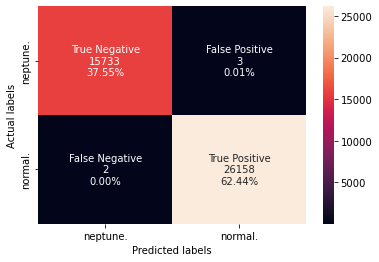

In [51]:
# Confusion matrix
cf_matrix = confusion_matrix(y_test_trim_outliers,y_pred)
binary_cf_matrix_plot(cf_matrix,['neptune.','normal.'])

### Model Performance (Removing outliers, feature scaling and resolving multicollinearity)

In [52]:
classifier = LogisticRegression(max_iter=10000)
classifier.fit(X_train_scaled_sub, y_train_trim_outliers_sub)
X_test_scaled_sub = X_test_scaled.drop(column_remove,axis=1).drop_duplicates()
y_test_trim_outliers_sub = y_test_trim_outliers.reset_index(drop=True)[X_test_scaled_sub.index]
y_pred = classifier.predict(X_test_scaled_sub)
y_pred_proba = classifier.predict_proba(X_test_scaled_sub)[:, 1]
print(classification_report(y_pred, y_test_trim_outliers_sub,digits=6))
print('Default threshold: 0.5')

              precision    recall  f1-score   support

    neptune.   0.997971  0.998247  0.998109     10839
     normal.   0.999190  0.999063  0.999126     23467

    accuracy                       0.998805     34306
   macro avg   0.998581  0.998655  0.998618     34306
weighted avg   0.998805  0.998805  0.998805     34306

Default threshold: 0.5


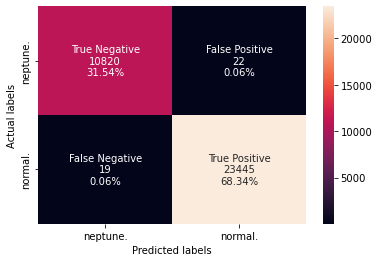

In [53]:
# Confusion matrix
cf_matrix = confusion_matrix(y_test_trim_outliers_sub,y_pred)
binary_cf_matrix_plot(cf_matrix,['neptune.','normal.'])

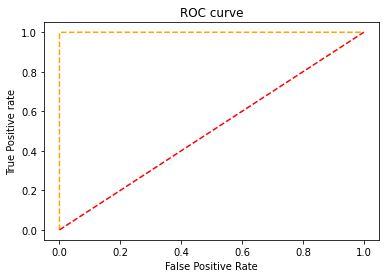

AUC Score: 0.999900132347635


In [54]:
# plotting ROC curve
fpr, tpr, thresh = roc_curve(y_test_trim_outliers_sub, y_pred_proba,pos_label='normal.',drop_intermediate=False)
plt.plot(fpr, tpr, linestyle='--',color='orange')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.title('ROC curve')
plt.show()
print(f"AUC Score: {roc_auc_score(y_test_trim_outliers_sub, y_pred_proba)}")

In [55]:
# Fitting logistic regression model with optimal threshold
lrt = LogisticRegressionWithThreshold(max_iter=10000)
lrt.fit(X_train_scaled_sub, y_train_trim_outliers_sub)
threshold, optimal_tpr_minus_fpr = lrt.threshold_from_optimal_tpr_minus_fpr(X_train_scaled_sub, y_train_trim_outliers_sub)
y_pred = lrt.predict(X_test_scaled_sub, threshold)
y_pred = np.where(y_pred==0,'neptune.','normal.')
print(classification_report(y_pred, y_test_trim_outliers_sub,digits=6))
print(f'Optimal threshold: {threshold}')

              precision    recall  f1-score   support

    neptune.   0.998063  0.998155  0.998109     10841
     normal.   0.999148  0.999105  0.999126     23465

    accuracy                       0.998805     34306
   macro avg   0.998605  0.998630  0.998618     34306
weighted avg   0.998805  0.998805  0.998805     34306

Optimal threshold: 0.523571062272835


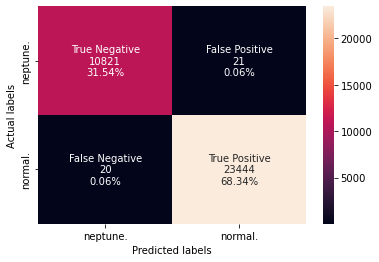

In [56]:
# Confusion matrix
cf_matrix = confusion_matrix(y_test_trim_outliers_sub,y_pred)
binary_cf_matrix_plot(cf_matrix,['neptune.','normal.'])

## Assumptions of Logistic Regression

### Type of dependent variable

For logistic regression, target variables should either be binary or nominal with 2 categories.

In [57]:
y_train.nunique()

2

Labels have binary (2) outcomes (i.e. normal vs neptune). Therefore, the assumption of binary target variable for logistic regression is met.

### Linearity of all features with log-odds

Relationship between log-odds and respective independent features should be linear. This can be verified using regression plots in seaborn.

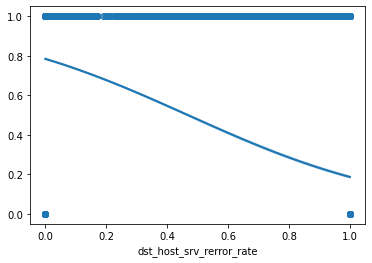

In [58]:
y_train_trim_outliers_binary = np.where(y_train_trim_outliers_sub == 'neptune.', 0, 1)
sns.regplot(x= X_train_scaled_sub['dst_host_srv_rerror_rate'], y= y_train_trim_outliers_binary, logistic= True)
plt.show()

The above plot shows that the variable is not linearly related with the log-odds. Therefore, the assumption of linearity of all features with log odds is violated.

### No strongly influential outliers

Logistic regression assumes that there are no highly influential outlier data points, as they distort the outcome and accuracy of the model.

Note that not all outliers are influential observations. Thus, two checks are required to identify strongly influential outliers:

1. Cook's distance > 4/Total number of observations (Influence: Summarizes the changes in the regression model when that particular (ith) observation is removed.)

2. Absolute standardized residual values > 3

In [59]:
# Fitting GLM on training set
logit_results = sm.GLM(y_train_trim_outliers_binary, X_train_scaled_sub, family=sm.families.Binomial()).fit()

In [60]:
import warnings
warnings.filterwarnings('ignore')
# Get influence measures
influence = logit_results.get_influence(observed=False)

# Obtain summary df of influence measures
summ_df = influence.summary_frame()

# Filter summary df to Cook's distance values only
diagnosis_df = summ_df[['cooks_d']]

# Set Cook's distance threshold
cook_threshold = 4 / len(X_train_scaled_sub)

# Append absolute standardized residual values 
diagnosis_df['std_resid'] = st.zscore(logit_results.resid_pearson)
diagnosis_df['std_resid'] = diagnosis_df['std_resid'].apply(lambda x: np.abs(x))

# Find observations which are BOTH outlier (std dev > 3) and highly influential
extreme = diagnosis_df[(diagnosis_df['cooks_d'] > cook_threshold) & (diagnosis_df['std_resid'] > 3)]

# Show all highly influential outlier observations
extreme.sort_values("cooks_d", ascending=False)

,cooks_d,std_resid
36537,0.148026,272.423204


In [65]:
X_train_scaled_sub.iloc[36537]

service_hash1                  0.000000
service_hash2                  0.000000
service_hash3                  0.000000
service_hash4                  0.000000
service_hash6                  0.000000
service_hash7                  0.000000
duration                       0.000000
protocol_type_2                0.000000
protocol_type_3                0.000000
flag_4                         0.000000
flag_5                         0.000000
flag_6                         0.000000
flag_7                         0.000000
flag_8                         0.000000
src_bytes                      2.435088
dst_bytes                      0.186184
hot                            0.000000
num_failed_logins              0.000000
num_compromised                0.000000
root_shell                     0.000000
su_attempted                   0.000000
num_root                       0.000000
num_file_creations             0.000000
num_shells                     0.000000
num_access_files               0.000000


Given there is one strongly influential outlier based on cook's threshold and standard deviation, further investigation is required to validate if the specified data point is considered to be an outlier based on the business context.

### Independence between observations

Observations in logistic regression model should be independent from each other. This can be checked by plotting residual series plot after fitting GLM (Generalized linear model).

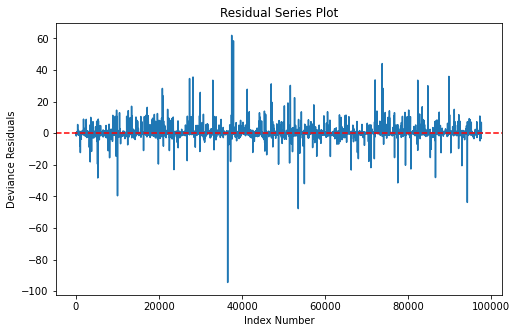

In [61]:
# Setup plot 
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, title="Residual Series Plot",xlabel="Index Number", ylabel="Deviance Residuals")

# Generate residual series plot using standardized deviance residuals
ax.plot(X_train_scaled_sub.index.tolist(), 
        st.zscore(logit_results.resid_deviance))

# Draw horizontal line at y=0
plt.axhline(y = 0, ls="--", color='red');

From the plot above, residuals seem to be randomly distributed across the entire dataset. Thus, the assumption of independence between observations is met.

### No multicollinearity

Using variance inflation factor (VIF), there should be no very strong correlation between features (No multicollinearity - Threshold of less than 5).

In [62]:
vif = [variance_inflation_factor(X_train_scaled_sub.values, i) for i in range(X_train_scaled_sub.shape[1])]
vif_results = pd.DataFrame({'vif': vif}, index=X_train_scaled_sub.columns)
vif_results.sort_values(by='vif',ascending=False)

,vif
protocol_type_2,4.264284
service_hash2,4.182542
is_guest_login,3.997193
service_hash1,3.526084
hot,3.404057
dst_host_diff_srv_rate,3.351027
count,3.130864
dst_host_srv_diff_host_rate,2.141350
src_bytes,1.994558
dst_bytes,1.815054


From the table above, all variables have VIF values less than 5. Thus, the assumption of no multicollinearity is met.